In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from io import BytesIO
import pyttsx3
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
datasetDir = 'Dataset'

# get the Subdirectory of the Dataset Folder
for root, folder, files in os.walk(datasetDir):
    if folder != []:
        listDir = folder

classes = []
# retrieve the name and the number of the classification
for i, category in enumerate(listDir):
    # print(category)
    classes.append(category)
    # classes.append({'name' : category,'id' : i + 1, "category" : category})
classes

['Bag',
 'Book',
 'Chair',
 'Cup',
 'Eraser',
 'Fork',
 'Pen',
 'Pencil',
 'Pencil Case',
 'Plate',
 'Soap',
 'Spoon',
 'Table',
 'Toothbrush',
 'Toothpaste']

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Create a datagen that is split the dataset into 80% Train and 20% Test
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    shear_range=20,
    zoom_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
)

# val_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=90,
#     shear_range=20,
#     zoom_range=0.5,
#     width_shift_range=0.5,
#     height_shift_range=0.5,
#     horizontal_flip=True,
#     validation_split=0.2,
# )

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Training Set
training_set = datagen.flow_from_directory(
    datasetDir,
    target_size=(299,299),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset="training",
    batch_size=32
)

# Validation Set
validation_set = datagen.flow_from_directory(
    datasetDir,
    target_size=(299,299),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset="validation",
    batch_size=32
)

test_set = test_datagen.flow_from_directory(
    'Test Set',
    target_size=(299,299),
    class_mode='categorical',
    color_mode='rgb',
    shuffle= False,
    batch_size=32
)

Found 2615 images belonging to 15 classes.
Found 647 images belonging to 15 classes.
Found 291 images belonging to 15 classes.


In [4]:
model_path = 'Model/InceptionV3-Adam-0.0001.h5'
image_path = 'Test/Image/Image1.jpg'

In [5]:
image = cv.imread(image_path)
image_2 = image.copy()
image = cv.resize(image, (299,299))

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_2 = cv.cvtColor(image_2, cv.COLOR_BGR2RGB)

image = np.expand_dims(image, axis=0)
# image = image / 255


(-0.5, 298.5, 298.5, -0.5)

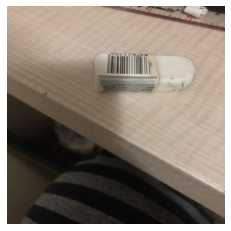

In [6]:
plt.imshow(np.squeeze(image))
plt.axis('off')

In [7]:
model = tf.keras.models.load_model(model_path)

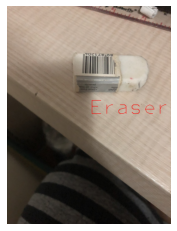

In [8]:
image_pred = model.predict(image)
image_pred = np.argmax(image_pred)
result = classes[image_pred]
image_2 = np.squeeze(image_2)
cv.putText(image_2 , text=result , org=(image_2.shape[1]//2 , image_2.shape[0]//2 ), fontFace=cv.FONT_HERSHEY_PLAIN, fontScale=10, color=(255,0,0), thickness=10)
plt.imshow(image_2)
plt.axis('off')
plt.show()


In [9]:
predict = model.predict(test_set)
pred = np.argmax(predict, axis=1)
# pred


### Confusion Matrix

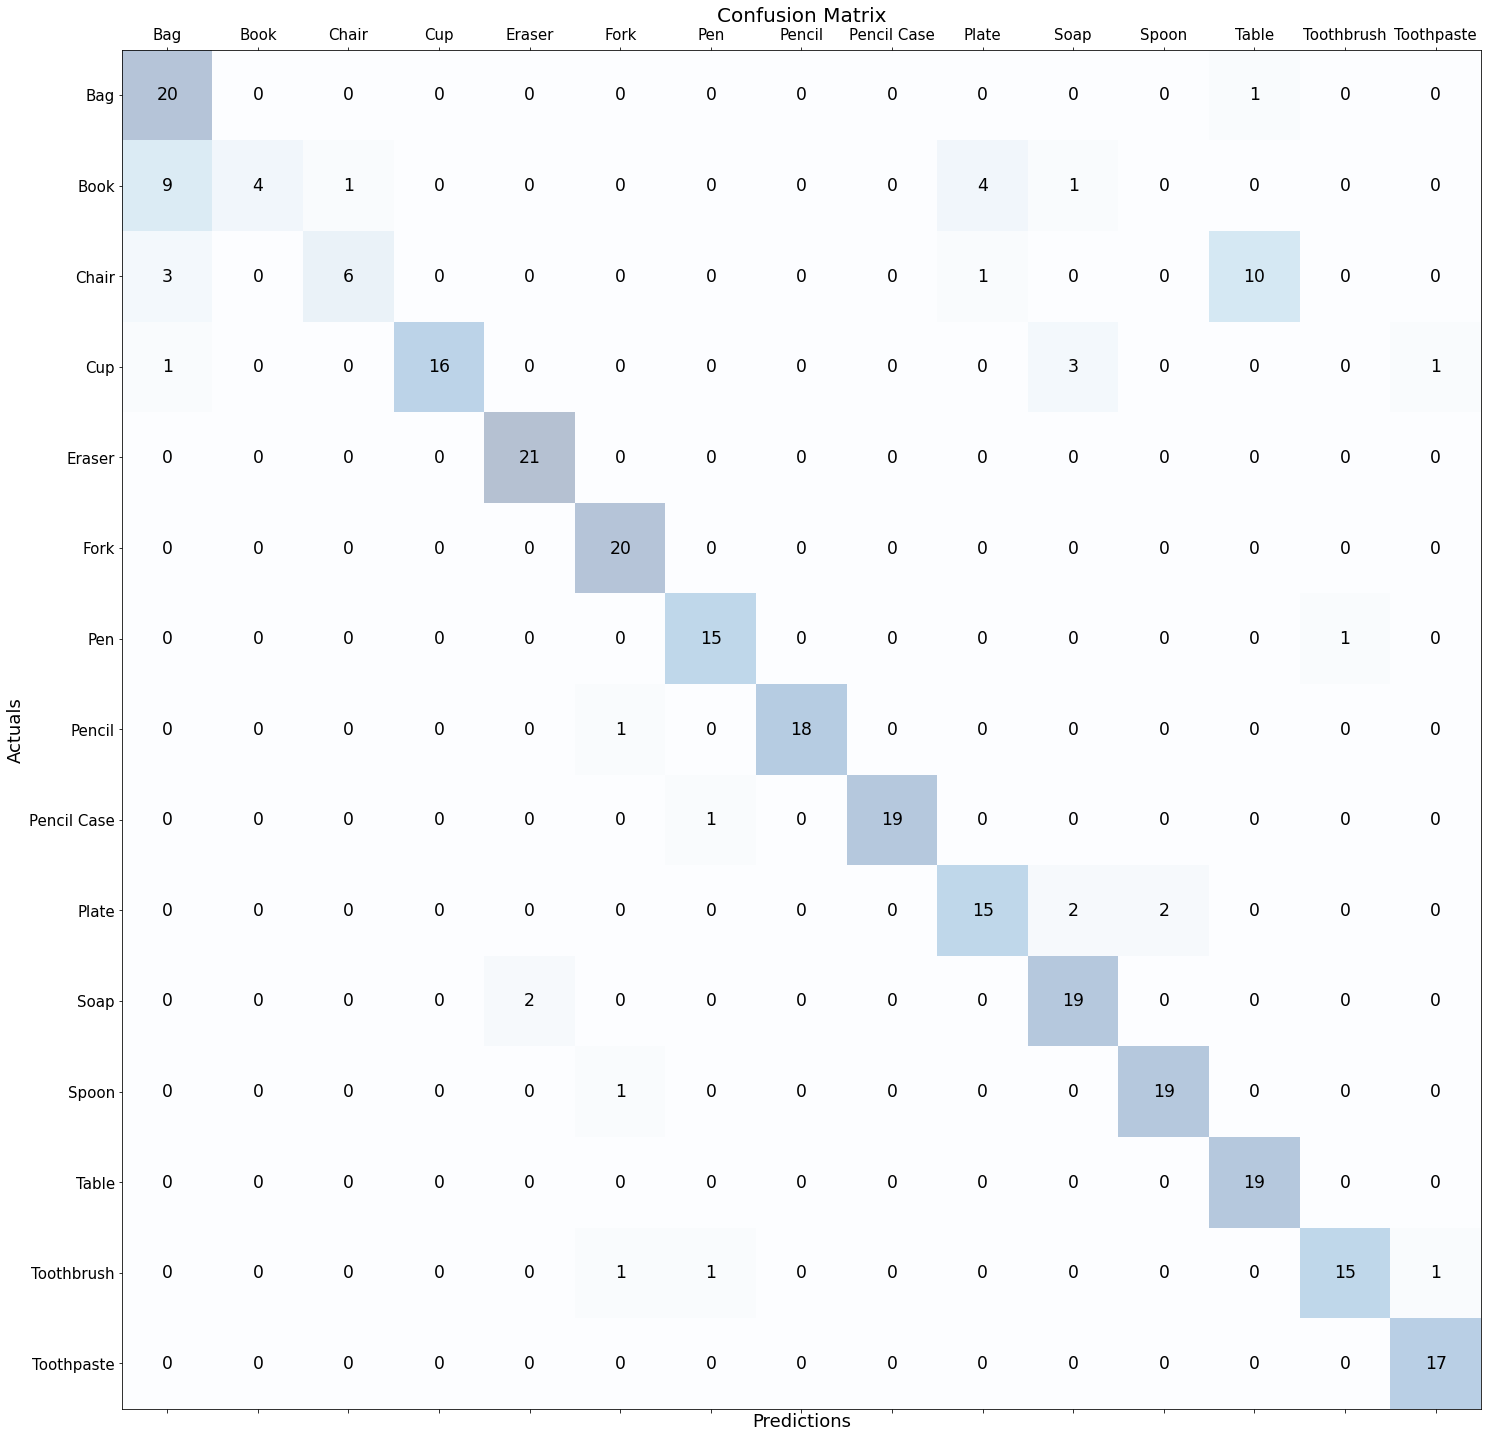

In [10]:
#https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
def confusionMatrix(y_true, y_pred):
    confusionMatrix = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(25, 25))
    ax.matshow(confusionMatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionMatrix.shape[0]):
        for j in range(confusionMatrix.shape[1]):
            ax.text(x=j, y=i, s=confusionMatrix[i, j], va='center', ha='center', size='xx-large')
    
    ax.set_xticks(np.arange(0, len(classes), 1))
    ax.set_yticks(np.arange(0, len(classes), 1))
    ax.set_xticklabels(classes, fontsize=15)
    ax.set_yticklabels(classes, fontsize=15)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=20)
    plt.show()

confusionMatrix(test_set.classes, pred)

### ROC AUC Curve

### Classification Report

In [11]:
def classficationReport(y_true, y_pred):
    report = classification_report(y_true, y_pred, target_names=classes)
    return report

print(classficationReport(test_set.classes, pred))

              precision    recall  f1-score   support

         Bag       0.61      0.95      0.74        21
        Book       1.00      0.21      0.35        19
       Chair       0.86      0.30      0.44        20
         Cup       1.00      0.76      0.86        21
      Eraser       0.91      1.00      0.95        21
        Fork       0.87      1.00      0.93        20
         Pen       0.88      0.94      0.91        16
      Pencil       1.00      0.95      0.97        19
 Pencil Case       1.00      0.95      0.97        20
       Plate       0.75      0.79      0.77        19
        Soap       0.76      0.90      0.83        21
       Spoon       0.90      0.95      0.93        20
       Table       0.63      1.00      0.78        19
  Toothbrush       0.94      0.83      0.88        18
  Toothpaste       0.89      1.00      0.94        17

    accuracy                           0.84       291
   macro avg       0.87      0.84      0.82       291
weighted avg       0.87   

### Text to Speech

In [12]:
engine = pyttsx3.init()

def setupVolume(engine, volume):
    engine.getProperty('volume')
    engine.setProperty('volume' , volume)

def setupRate(engine, rate):
    engine.getProperty('rate')
    engine.setProperty('rate' , rate)


def setupVoice(engine, id):
    voices = engine.getProperty('voices')
    engine.setProperty('voice' , voices[id].id)
    # for voice in voices:
    #     print(voice)


def speak(engine, text):
    setupRate(engine, 150)
    engine.say("This is " + text)
    engine.runAndWait()

def spell(engine, text):
    setupRate(engine, 200)
    for i in range(len(text)):
        engine.say(text[i])
        engine.runAndWait()



In [13]:
# speak(engine , result)
setupVoice(engine, 1)
setupVolume(engine, 50)
# setupRate(engine, 100)
# speak(engine , result)
spell(engine, result)
speak(engine, result)

In [14]:
cv.waitKey(0)
cv.destroyAllWindows()